In [33]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed\moon_filtered.png


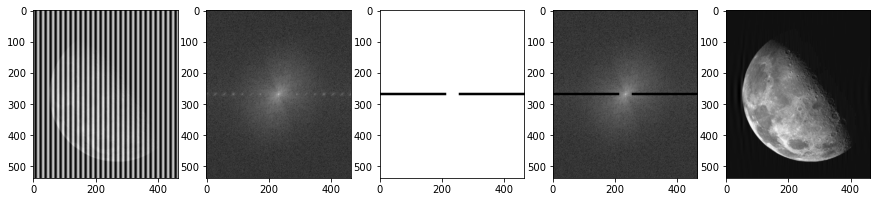

In [40]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    fig, axs = plt.subplots(1, 5, figsize=(15,5))
    axs[0].imshow(im, cmap="gray")
    
    fft = np.fft.fft2(im)
    
    axs[1].imshow(np.log(.01 + np.abs(np.fft.fftshift(fft))), cmap="gray")
    
    fft_kernel = np.ones_like(fft)
    fft_kernel[:4,20:-20] = 0
    fft_kernel[-4:,20:-20] = 0
    
    axs[2].imshow(np.abs(np.fft.fftshift(fft_kernel)), cmap="gray")
    
    fft_filtered = fft * fft_kernel
    
    axs[3].imshow(np.log(.01 + np.abs(np.fft.fftshift(fft_filtered))), cmap="gray")

    
    im_filtered = np.abs(np.fft.ifft2(fft_filtered))
    axs[4].imshow(im_filtered, cmap="gray")
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))